# What Stats are Most Correlated to Success in the 2023 - 2024 Premier League Season?

In [253]:
import pandas as pd

In [254]:
df = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')

In [255]:
#print tables from webpage. use index number to print the tables I want to extract and analyze data from

In [256]:
#want tables with index 0, 2 and 3
table_index = 0
table_index_for = 2
table_index_against = 3
df_table = df[table_index]
df_standard_for = df[table_index_for]
df_standard_against = df[table_index_against]

In [257]:
df_standard_for.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
               Squad               # Pl                Age               Poss   
0            Arsenal                 25               25.6               60.3   
1        Aston Villa                 29               27.6               54.9   
2        Bournemouth                 28               26.4               45.2   
3          Brentford                 28               27.4               44.6   
4           Brighton                 28               26.7               61.7   

  Playing Time                    Performance      ... Per 90 Minutes        \
            MP Starts   Min   90s         Gls Ast  ...            Gls   Ast   
0           29    319  2610  29.0          67  47  ...           2.31  1.62   
1           30    330  2700  30.0          59  43  ...           1.97  1.43   
2           30    330  2700  30.0          43  32  ...           1.43  1.07   
3           30    330  2700  30.0          41  26  ...           1.37  0.87   
4           29    319  2610  29.0          47  35  ...           1.62  1.21   

                                                        
    G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0  3.93  2.03   3.66  1.97  1.38   3.36  1.77     3.15  
1  3.40  1.83   3.27  1.76  1.30   3.05  1.65     2.95  
2  2.50  1.40   2.47  1.50  1.09   2.59  1.45     2.54  
3  2.23  1.27   2.13  1.61  1.14   2.75  1.54     2.68  
4  2.83  1.45   2.66  1.58  1.16   2.75  1.46     2.62  

[5 rows x 32 columns]

In [258]:
df_standard_for.columns

MultiIndex([('Unnamed: 0_level_0',    'Squad'),
            ('Unnamed: 1_level_0',     '# Pl'),
            ('Unnamed: 2_level_0',      'Age'),
            ('Unnamed: 3_level_0',     'Poss'),
            (      'Playing Time',       'MP'),
            (      'Playing Time',   'Starts'),
            (      'Playing Time',      'Min'),
            (      'Playing Time',      '90s'),
            (       'Performance',      'Gls'),
            (       'Performance',      'Ast'),
            (       'Performance',      'G+A'),
            (       'Performance',     'G-PK'),
            (       'Performance',       'PK'),
            (       'Performance',    'PKatt'),
            (       'Performance',     'CrdY'),
            (       'Performance',     'CrdR'),
            (          'Expected',       'xG'),
            (          'Expected',     'npxG'),
            (          'Expected',      'xAG'),
            (          'Expected', 'npxG+xAG'),
            (       'Progression',     '

In [259]:
#check the number of levels in the MultiIndex columns
num_levels = df_standard_for.columns.nlevels
if num_levels > 1:
    df_standard_for.columns = df_standard_for.columns.droplevel(0)

#view column names
df_standard_for.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls', 'Ast', 'G+A', 'G-PK',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

In [260]:
#check the number of levels in the MultiIndex columns
num_levels = df_standard_against.columns.nlevels
if num_levels > 1:
    df_standard_against.columns = df_standard_against.columns.droplevel(0)

#view column names
df_standard_against.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls', 'Ast', 'G+A', 'G-PK',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

In [261]:
#dataframe with first index of columns removed
df_standard_against.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
0,vs Arsenal,25,27.2,39.7,29,319,2610,29.0,23,18,...,0.79,0.62,1.41,0.76,1.38,0.70,0.52,1.22,0.65,1.17
1,vs Aston Villa,29,27.1,45.1,30,330,2700,30.0,39,34,...,1.30,1.13,2.43,1.30,2.43,1.44,1.23,2.67,1.44,2.67
2,vs Bournemouth,28,27.0,54.8,30,330,2700,30.0,52,34,...,1.73,1.13,2.87,1.60,2.73,1.53,1.03,2.57,1.40,2.43
3,vs Brentford,28,26.7,55.4,30,330,2700,30.0,55,44,...,1.83,1.47,3.30,1.77,3.23,1.53,1.22,2.75,1.47,2.70
4,vs Brighton,28,27.2,38.3,29,319,2610,29.0,44,30,...,1.52,1.03,2.55,1.34,2.38,1.43,0.96,2.39,1.29,2.25


In [262]:
df_table.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,29,20,7,2,67,27,40,67,2.31,65.3,34.9,30.4,1.05,W W W D W,54888,Mohamed Salah - 16,Alisson,NaN
1,2,Arsenal,29,20,5,4,70,24,46,65,2.24,57.3,20.4,36.8,1.27,W W W W D,60213,Bukayo Saka - 13,David Raya,NaN
2,3,Manchester City,29,19,7,3,63,28,35,64,2.21,57.6,28.2,29.4,1.01,W W W D D,52941,Erling Haaland - 18,Ederson,NaN
3,4,Aston Villa,30,18,5,7,62,42,20,59,1.97,52.7,43.3,9.3,0.31,W W L D W,41939,Ollie Watkins - 16,Emiliano Martínez,NaN
4,5,Tottenham,30,17,6,7,62,44,18,57,1.90,53.2,48.5,4.7,0.16,W W L W D,61553,Son Heung-min - 15,Guglielmo Vicario,NaN


In [263]:
#drop unwanted columns
#create per 90 stats for things like goals, assists, etc.
#correlation testing
#match teams up for next GW

In [264]:
df_table.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')

In [265]:
df_standard_for.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls', 'Ast', 'G+A', 'G-PK',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

In [266]:
df_standard_against.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls', 'Ast', 'G+A', 'G-PK',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

In [267]:
#create new dataframes with only the columns we want to use
selected_table = df_table[['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90']]
selected_for = df_standard_for[['Squad', 'Poss', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'G+A-PK', 'xG+xAG']]
selected_against = df_standard_against[['Squad', 'Poss', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'G+A-PK', 'xG+xAG']]

In [268]:
selected_table.head(2)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
0,1,Liverpool,29,20,7,2,67,27,40,67,2.31,65.3,34.9,30.4,1.05
1,2,Arsenal,29,20,5,4,70,24,46,65,2.24,57.3,20.4,36.8,1.27


In [269]:
selected_for.head(2)

,Squad,Poss,Gls,Gls,Ast,Ast,G+A,G+A,G-PK,G-PK,...,npxG,npxG,xAG,xAG,npxG+xAG,npxG+xAG,PrgC,PrgP,G+A-PK,xG+xAG
0,Arsenal,60.3,67,2.31,47,1.62,114,3.93,59,2.03,...,51.2,1.77,40.0,1.38,91.2,3.15,639,1658,3.66,3.36
1,Aston Villa,54.9,59,1.97,43,1.43,102,3.40,55,1.83,...,49.6,1.65,39.0,1.30,88.5,2.95,648,1235,3.27,3.05


In [270]:
selected_against.head(2)

,Squad,Poss,Gls,Gls,Ast,Ast,G+A,G+A,G-PK,G-PK,...,npxG,npxG,xAG,xAG,npxG+xAG,npxG+xAG,PrgC,PrgP,G+A-PK,xG+xAG
0,vs Arsenal,39.7,23,0.79,18,0.62,41,1.41,22,0.76,...,18.9,0.65,15.1,0.52,34.0,1.17,377,667,1.38,1.22
1,vs Aston Villa,45.1,39,1.30,34,1.13,73,2.43,39,1.30,...,43.3,1.44,36.8,1.23,80.1,2.67,462,903,2.43,2.67


In [271]:
#remove "vs " from stats against to normalize 'Squad' across the dataframes
selected_against['Squad'] = selected_for['Squad'].str.replace('vs ', '', regex = False)
selected_against.head()

/var/folders/jp/3fktnqd5023f4kfkp0wgrq4w0000gn/T/ipykernel_97379/4147698335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_against['Squad'] = selected_for['Squad'].str.replace('vs ', '', regex = False)


,Squad,Poss,Gls,Gls,Ast,Ast,G+A,G+A,G-PK,G-PK,...,npxG,npxG,xAG,xAG,npxG+xAG,npxG+xAG,PrgC,PrgP,G+A-PK,xG+xAG
0,Arsenal,39.7,23,0.79,18,0.62,41,1.41,22,0.76,...,18.9,0.65,15.1,0.52,34.0,1.17,377,667,1.38,1.22
1,Aston Villa,45.1,39,1.30,34,1.13,73,2.43,39,1.30,...,43.3,1.44,36.8,1.23,80.1,2.67,462,903,2.43,2.67
2,Bournemouth,54.8,52,1.73,34,1.13,86,2.87,48,1.60,...,41.9,1.40,30.9,1.03,72.9,2.43,570,1179,2.73,2.57
3,Brentford,55.4,55,1.83,44,1.47,99,3.30,53,1.77,...,44.2,1.47,36.7,1.22,80.9,2.70,667,1293,3.23,2.75
4,Brighton,38.3,44,1.52,30,1.03,74,2.55,39,1.34,...,37.5,1.29,27.8,0.96,65.4,2.25,468,883,2.38,2.39


In [272]:
selected_for.columns

Index(['Squad', 'Poss', 'Gls', 'Gls', 'Ast', 'Ast', 'G+A', 'G+A', 'G-PK',
       'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'xG', 'npxG', 'npxG',
       'xAG', 'xAG', 'npxG+xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'G+A-PK',
       'xG+xAG'],
      dtype='object')

In [273]:
for index, column_name in enumerate(selected_for.columns):
    print(f"Index: {index}, Column Name: {column_name}")

Index: 0, Column Name: Squad
Index: 1, Column Name: Poss
Index: 2, Column Name: Gls
Index: 3, Column Name: Gls
Index: 4, Column Name: Ast
Index: 5, Column Name: Ast
Index: 6, Column Name: G+A
Index: 7, Column Name: G+A
Index: 8, Column Name: G-PK
Index: 9, Column Name: G-PK
Index: 10, Column Name: PK
Index: 11, Column Name: PKatt
Index: 12, Column Name: CrdY
Index: 13, Column Name: CrdR
Index: 14, Column Name: xG
Index: 15, Column Name: xG
Index: 16, Column Name: npxG
Index: 17, Column Name: npxG
Index: 18, Column Name: xAG
Index: 19, Column Name: xAG
Index: 20, Column Name: npxG+xAG
Index: 21, Column Name: npxG+xAG
Index: 22, Column Name: PrgC
Index: 23, Column Name: PrgP
Index: 24, Column Name: G+A-PK
Index: 25, Column Name: xG+xAG


In [274]:
#change goals - penalties with non penalty goals
new_col_for = {
    'G-PK': 'npG',
}
# Rename the columns
selected_for = selected_for.rename(columns=new_col_for)

In [275]:
#function to change the duplicate column names so that they are per 90
def rename_columns_with_suffix(selected_for):
    new_columns = []  # Initialize a list to store new column names
    seen_columns = set()  # Initialize a set to keep track of seen column names
    for col_index, column_name in enumerate(selected_for.columns):
        # Check if the column name is already in the set of seen column names
        if column_name in seen_columns:
            # If yes, add a suffix to the column name
            new_column_name = f'{column_name}/90'
        else:
            # If no, keep the original column name
            new_column_name = column_name
        new_columns.append(new_column_name)  # Add the new column name to the list
        seen_columns.add(column_name)  # Add the column name to the set of seen column names
    selected_for.columns = new_columns  # Assign the new column names to the DataFrame

# Rename columns with suffixes
rename_columns_with_suffix(selected_for)

selected_for.head()

,Squad,Poss,Gls,Gls/90,Ast,Ast/90,G+A,G+A/90,npG,npG/90,...,npxG,npxG/90,xAG,xAG/90,npxG+xAG,npxG+xAG/90,PrgC,PrgP,G+A-PK,xG+xAG
0,Arsenal,60.3,67,2.31,47,1.62,114,3.93,59,2.03,...,51.2,1.77,40.0,1.38,91.2,3.15,639,1658,3.66,3.36
1,Aston Villa,54.9,59,1.97,43,1.43,102,3.40,55,1.83,...,49.6,1.65,39.0,1.30,88.5,2.95,648,1235,3.27,3.05
2,Bournemouth,45.2,43,1.43,32,1.07,75,2.50,42,1.40,...,43.4,1.45,32.8,1.09,76.2,2.54,558,1077,2.47,2.59
3,Brentford,44.6,41,1.37,26,0.87,67,2.23,38,1.27,...,46.1,1.54,34.2,1.14,80.3,2.68,377,1026,2.13,2.75
4,Brighton,61.7,47,1.62,35,1.21,82,2.83,42,1.45,...,42.3,1.46,33.7,1.16,76.0,2.62,654,1437,2.66,2.75


In [276]:
for index, column_name in enumerate(selected_for.columns):
    print(f"Index: {index}, Column Name: {column_name}")

Index: 0, Column Name: Squad
Index: 1, Column Name: Poss
Index: 2, Column Name: Gls
Index: 3, Column Name: Gls/90
Index: 4, Column Name: Ast
Index: 5, Column Name: Ast/90
Index: 6, Column Name: G+A
Index: 7, Column Name: G+A/90
Index: 8, Column Name: npG
Index: 9, Column Name: npG/90
Index: 10, Column Name: PK
Index: 11, Column Name: PKatt
Index: 12, Column Name: CrdY
Index: 13, Column Name: CrdR
Index: 14, Column Name: xG
Index: 15, Column Name: xG/90
Index: 16, Column Name: npxG
Index: 17, Column Name: npxG/90
Index: 18, Column Name: xAG
Index: 19, Column Name: xAG/90
Index: 20, Column Name: npxG+xAG
Index: 21, Column Name: npxG+xAG/90
Index: 22, Column Name: PrgC
Index: 23, Column Name: PrgP
Index: 24, Column Name: G+A-PK
Index: 25, Column Name: xG+xAG


In [277]:
for index, column_name in enumerate(selected_against.columns):
    print(f"Index: {index}, Column Name: {column_name}")

Index: 0, Column Name: Squad
Index: 1, Column Name: Poss
Index: 2, Column Name: Gls
Index: 3, Column Name: Gls
Index: 4, Column Name: Ast
Index: 5, Column Name: Ast
Index: 6, Column Name: G+A
Index: 7, Column Name: G+A
Index: 8, Column Name: G-PK
Index: 9, Column Name: G-PK
Index: 10, Column Name: PK
Index: 11, Column Name: PKatt
Index: 12, Column Name: CrdY
Index: 13, Column Name: CrdR
Index: 14, Column Name: xG
Index: 15, Column Name: xG
Index: 16, Column Name: npxG
Index: 17, Column Name: npxG
Index: 18, Column Name: xAG
Index: 19, Column Name: xAG
Index: 20, Column Name: npxG+xAG
Index: 21, Column Name: npxG+xAG
Index: 22, Column Name: PrgC
Index: 23, Column Name: PrgP
Index: 24, Column Name: G+A-PK
Index: 25, Column Name: xG+xAG


In [278]:
#change goals - penalties with non penalty goals
new_col_against = {
    'G-PK': 'npG',
}
# Rename the columns
selected_against = selected_against.rename(columns=new_col_against)

In [279]:
#function to change the duplicate column names so that they are per 90
def rename_columns_with_suffix(selected_against):
    new_columns = []  # Initialize a list to store new column names
    seen_columns = set()  # Initialize a set to keep track of seen column names
    for col_index, column_name in enumerate(selected_against.columns):
        # Check if the column name is already in the set of seen column names
        if column_name in seen_columns:
            # If yes, add a suffix to the column name
            new_column_name = f'{column_name}/90'
        else:
            # If no, keep the original column name
            new_column_name = column_name
        new_columns.append(new_column_name)  # Add the new column name to the list
        seen_columns.add(column_name)  # Add the column name to the set of seen column names
    selected_against.columns = new_columns  # Assign the new column names to the DataFrame

# Rename columns with suffixes
rename_columns_with_suffix(selected_against)

selected_against.head()

,Squad,Poss,Gls,Gls/90,Ast,Ast/90,G+A,G+A/90,npG,npG/90,...,npxG,npxG/90,xAG,xAG/90,npxG+xAG,npxG+xAG/90,PrgC,PrgP,G+A-PK,xG+xAG
0,Arsenal,39.7,23,0.79,18,0.62,41,1.41,22,0.76,...,18.9,0.65,15.1,0.52,34.0,1.17,377,667,1.38,1.22
1,Aston Villa,45.1,39,1.30,34,1.13,73,2.43,39,1.30,...,43.3,1.44,36.8,1.23,80.1,2.67,462,903,2.43,2.67
2,Bournemouth,54.8,52,1.73,34,1.13,86,2.87,48,1.60,...,41.9,1.40,30.9,1.03,72.9,2.43,570,1179,2.73,2.57
3,Brentford,55.4,55,1.83,44,1.47,99,3.30,53,1.77,...,44.2,1.47,36.7,1.22,80.9,2.70,667,1293,3.23,2.75
4,Brighton,38.3,44,1.52,30,1.03,74,2.55,39,1.34,...,37.5,1.29,27.8,0.96,65.4,2.25,468,883,2.38,2.39


In [280]:
for index, column_name in enumerate(selected_for.columns):
    print(f"Index: {index}, Column Name: {column_name}")

Index: 0, Column Name: Squad
Index: 1, Column Name: Poss
Index: 2, Column Name: Gls
Index: 3, Column Name: Gls/90
Index: 4, Column Name: Ast
Index: 5, Column Name: Ast/90
Index: 6, Column Name: G+A
Index: 7, Column Name: G+A/90
Index: 8, Column Name: npG
Index: 9, Column Name: npG/90
Index: 10, Column Name: PK
Index: 11, Column Name: PKatt
Index: 12, Column Name: CrdY
Index: 13, Column Name: CrdR
Index: 14, Column Name: xG
Index: 15, Column Name: xG/90
Index: 16, Column Name: npxG
Index: 17, Column Name: npxG/90
Index: 18, Column Name: xAG
Index: 19, Column Name: xAG/90
Index: 20, Column Name: npxG+xAG
Index: 21, Column Name: npxG+xAG/90
Index: 22, Column Name: PrgC
Index: 23, Column Name: PrgP
Index: 24, Column Name: G+A-PK
Index: 25, Column Name: xG+xAG


In [281]:
for index, column_name in enumerate(selected_against.columns):
    print(f"Index: {index}, Column Name: {column_name}")

Index: 0, Column Name: Squad
Index: 1, Column Name: Poss
Index: 2, Column Name: Gls
Index: 3, Column Name: Gls/90
Index: 4, Column Name: Ast
Index: 5, Column Name: Ast/90
Index: 6, Column Name: G+A
Index: 7, Column Name: G+A/90
Index: 8, Column Name: npG
Index: 9, Column Name: npG/90
Index: 10, Column Name: PK
Index: 11, Column Name: PKatt
Index: 12, Column Name: CrdY
Index: 13, Column Name: CrdR
Index: 14, Column Name: xG
Index: 15, Column Name: xG/90
Index: 16, Column Name: npxG
Index: 17, Column Name: npxG/90
Index: 18, Column Name: xAG
Index: 19, Column Name: xAG/90
Index: 20, Column Name: npxG+xAG
Index: 21, Column Name: npxG+xAG/90
Index: 22, Column Name: PrgC
Index: 23, Column Name: PrgP
Index: 24, Column Name: G+A-PK
Index: 25, Column Name: xG+xAG


In [282]:
selected_for.head(1)

,Squad,Poss,Gls,Gls/90,Ast,Ast/90,G+A,G+A/90,npG,npG/90,...,npxG,npxG/90,xAG,xAG/90,npxG+xAG,npxG+xAG/90,PrgC,PrgP,G+A-PK,xG+xAG
0,Arsenal,60.3,67,2.31,47,1.62,114,3.93,59,2.03,...,51.2,1.77,40.0,1.38,91.2,3.15,639,1658,3.66,3.36


In [283]:
selected_against.head(1)

,Squad,Poss,Gls,Gls/90,Ast,Ast/90,G+A,G+A/90,npG,npG/90,...,npxG,npxG/90,xAG,xAG/90,npxG+xAG,npxG+xAG/90,PrgC,PrgP,G+A-PK,xG+xAG
0,Arsenal,39.7,23,0.79,18,0.62,41,1.41,22,0.76,...,18.9,0.65,15.1,0.52,34.0,1.17,377,667,1.38,1.22


In [284]:
selected_table.head(1)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
0,1,Liverpool,29,20,7,2,67,27,40,67,2.31,65.3,34.9,30.4,1.05


In [285]:
#create new table df with just squad and points per match played
table_pts_mp = selected_table[['Squad','Pts/MP']]
table_pts_mp.head(1)

,Squad,Pts/MP
0,Liverpool,2.31


In [286]:
#select numeric columns
numeric_columns_for = selected_for.select_dtypes(include=['float64', 'int64'])

#calculate correlation with 'Pts/MP'
corr_for_with_pts_mp = numeric_columns_for.corrwith(merged_df_for['Pts/MP'])

print(corr_for_with_pts_mp)

Poss           0.835468
Gls            0.889611
Gls/90         0.904347
Ast            0.866410
Ast/90         0.888820
G+A            0.891725
G+A/90         0.909661
npG            0.883582
npG/90         0.906727
PK             0.390116
PKatt          0.501919
CrdY          -0.346883
CrdR           0.025568
xG             0.852134
xG/90          0.853189
npxG           0.837813
npxG/90        0.850465
xAG            0.858780
xAG/90         0.867281
npxG+xAG       0.854070
npxG+xAG/90    0.865569
PrgC           0.788839
PrgP           0.881868
G+A-PK         0.909025
xG+xAG         0.869942
dtype: float64


In [287]:
#select numeric columns
numeric_columns_against = selected_against.select_dtypes(include=['float64', 'int64'])

#calculate correlation with 'Pts/MP'
corr_against_with_pts_mp = numeric_columns_against.corrwith(merged_df_against['Pts/MP'])

print(corr_against_with_pts_mp)

Poss          -0.835468
Gls           -0.871455
Gls/90        -0.858194
Ast           -0.818732
Ast/90        -0.804964
G+A           -0.858880
G+A/90        -0.845315
npG           -0.845521
npG/90        -0.827287
PK            -0.321044
PKatt         -0.317755
CrdY           0.604982
CrdR          -0.057919
xG            -0.678272
xG/90         -0.665494
npxG          -0.660448
npxG/90       -0.640327
xAG           -0.643300
xAG/90        -0.629426
npxG+xAG      -0.657007
npxG+xAG/90   -0.640070
PrgC          -0.684010
PrgP          -0.731340
G+A-PK        -0.824710
xG+xAG        -0.654186
dtype: float64


In [288]:
#use correlation statistics to analyze teams. pit teams against each other

In [289]:
against_copy = selected_against.copy()
for_copy = selected_for.copy()
table_copy = table_pts_mp.copy()

In [290]:
#correlate stats for and against with points per match

merged_stats = pd.merge(selected_for, selected_against, on ='Squad')

numeric_columns_merged = merged_stats.select_dtypes(include=['float64', 'int64'])

corr_merged_pts_mp = numeric_columns_merged.corrwith(table_pts_mp['Pts/MP'])

print(corr_merged_pts_mp)

Poss_x           0.231242
Gls_x            0.175304
Gls/90_x         0.194366
Ast_x            0.070873
Ast/90_x         0.092833
G+A_x            0.129041
G+A/90_x         0.149248
npG_x            0.152755
npG/90_x         0.173823
PK_x             0.190125
PKatt_x          0.161891
CrdY_x          -0.293883
CrdR_x          -0.147275
xG_x             0.210031
xG/90_x          0.220497
npxG_x           0.203070
npxG/90_x        0.219020
xAG_x            0.184991
xAG/90_x         0.199829
npxG+xAG_x       0.196076
npxG+xAG/90_x    0.210488
PrgC_x           0.120168
PrgP_x           0.244902
G+A-PK_x         0.138040
xG+xAG_x         0.212658
Poss_y          -0.231242
Gls_y           -0.237359
Gls/90_y        -0.232126
Ast_y           -0.181625
Ast/90_y        -0.177836
G+A_y           -0.215609
G+A/90_y        -0.209517
npG_y           -0.171257
npG/90_y        -0.164060
PK_y            -0.434793
PKatt_y         -0.453551
CrdY_y           0.134962
CrdR_y           0.117533
xG_y        

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
#added points per match to stats dataframe

merged_df = pd.merge(table_pts_mp, merged_stats, on='Squad')

In [293]:
merged_df.head()

,Squad,Pts/MP,Poss_x,Gls_x,Gls/90_x,Ast_x,Ast/90_x,G+A_x,G+A/90_x,npG_x,...,npxG_y,npxG/90_y,xAG_y,xAG/90_y,npxG+xAG_y,npxG+xAG/90_y,PrgC_y,PrgP_y,G+A-PK_y,xG+xAG_y
0,Liverpool,2.31,60.0,63,2.17,49,1.69,112,3.86,58,...,34.2,1.18,24.5,0.84,58.6,2.02,439,926,1.45,2.05
1,Arsenal,2.24,60.3,67,2.31,47,1.62,114,3.93,59,...,18.9,0.65,15.1,0.52,34.0,1.17,377,667,1.38,1.22
2,Manchester City,2.21,65.3,62,2.14,47,1.62,109,3.76,58,...,25.9,0.89,20.9,0.72,46.8,1.61,362,637,1.52,1.69
3,Aston Villa,1.97,54.9,59,1.97,43,1.43,102,3.40,55,...,43.3,1.44,36.8,1.23,80.1,2.67,462,903,2.43,2.67
4,Tottenham,1.90,61.1,58,1.93,49,1.63,107,3.57,57,...,44.3,1.48,32.3,1.08,76.5,2.55,433,873,2.10,2.69


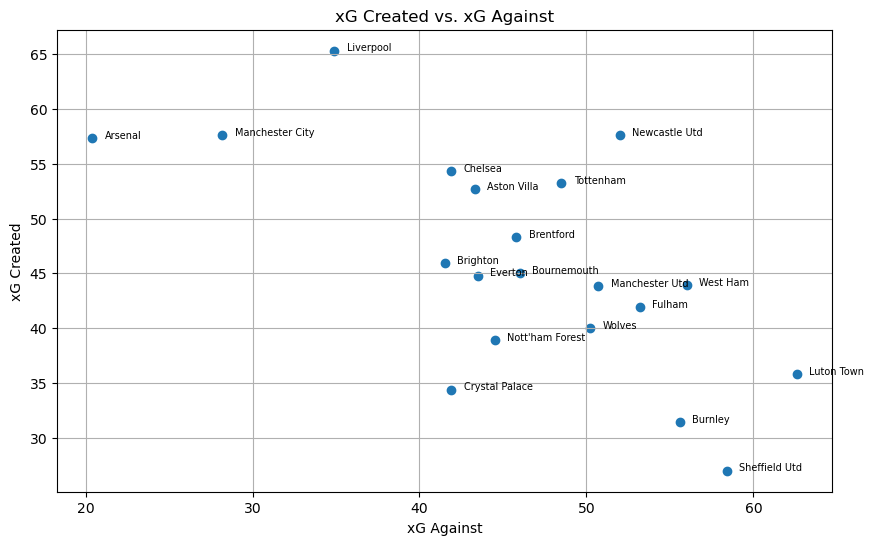

In [294]:
#scatter plot xG Created vs. xG Against

plt.figure(figsize = (10,6))
plt.scatter(merged_df['xG_y'], merged_df['xG_x'])

offset = 0.75
for i, row in merged_df.iterrows():
    plt.text(row['xG_y'] + offset, row['xG_x'], row['Squad'], fontsize = 7)

plt.title('xG Created vs. xG Against')
plt.xlabel('xG Against')
plt.ylabel('xG Created')
plt.grid(True)
plt.show()

In [295]:
#created xG against variable in merged dataframe

merged_df['xGD'] = merged_df['xG_x'] - merged_df['xG_y']
merged_df.head()

,Squad,Pts/MP,Poss_x,Gls_x,Gls/90_x,Ast_x,Ast/90_x,G+A_x,G+A/90_x,npG_x,...,npxG/90_y,xAG_y,xAG/90_y,npxG+xAG_y,npxG+xAG/90_y,PrgC_y,PrgP_y,G+A-PK_y,xG+xAG_y,xGD
0,Liverpool,2.31,60.0,63,2.17,49,1.69,112,3.86,58,...,1.18,24.5,0.84,58.6,2.02,439,926,1.45,2.05,30.4
1,Arsenal,2.24,60.3,67,2.31,47,1.62,114,3.93,59,...,0.65,15.1,0.52,34.0,1.17,377,667,1.38,1.22,36.9
2,Manchester City,2.21,65.3,62,2.14,47,1.62,109,3.76,58,...,0.89,20.9,0.72,46.8,1.61,362,637,1.52,1.69,29.4
3,Aston Villa,1.97,54.9,59,1.97,43,1.43,102,3.40,55,...,1.44,36.8,1.23,80.1,2.67,462,903,2.43,2.67,9.4
4,Tottenham,1.90,61.1,58,1.93,49,1.63,107,3.57,57,...,1.48,32.3,1.08,76.5,2.55,433,873,2.10,2.69,4.7


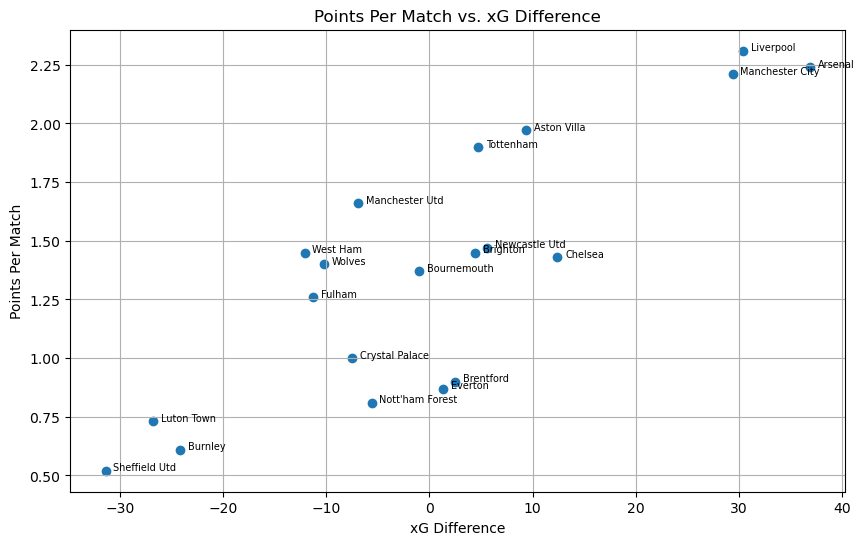

In [296]:
#scatter plot of Points Per Match and xG Difference

plt.figure(figsize = (10,6))
plt.scatter(merged_df['xGD'], merged_df['Pts/MP'])

offset = 0.75
for i, row in merged_df.iterrows():
    plt.text(row['xGD'] + offset, row['Pts/MP'], row['Squad'], fontsize = 7)

plt.title('Points Per Match vs. xG Difference')
plt.xlabel('xG Difference')
plt.ylabel('Points Per Match')
plt.grid(True)
plt.show()

In [297]:
merged_df.columns

Index(['Squad', 'Pts/MP', 'Poss_x', 'Gls_x', 'Gls/90_x', 'Ast_x', 'Ast/90_x',
       'G+A_x', 'G+A/90_x', 'npG_x', 'npG/90_x', 'PK_x', 'PKatt_x', 'CrdY_x',
       'CrdR_x', 'xG_x', 'xG/90_x', 'npxG_x', 'npxG/90_x', 'xAG_x', 'xAG/90_x',
       'npxG+xAG_x', 'npxG+xAG/90_x', 'PrgC_x', 'PrgP_x', 'G+A-PK_x',
       'xG+xAG_x', 'Poss_y', 'Gls_y', 'Gls/90_y', 'Ast_y', 'Ast/90_y', 'G+A_y',
       'G+A/90_y', 'npG_y', 'npG/90_y', 'PK_y', 'PKatt_y', 'CrdY_y', 'CrdR_y',
       'xG_y', 'xG/90_y', 'npxG_y', 'npxG/90_y', 'xAG_y', 'xAG/90_y',
       'npxG+xAG_y', 'npxG+xAG/90_y', 'PrgC_y', 'PrgP_y', 'G+A-PK_y',
       'xG+xAG_y', 'xGD'],
      dtype='object')

In [298]:
#removed 'Squad' because string

merged_df_no_squad = merged_df[['Pts/MP', 'Poss_x', 'Gls_x', 'Gls/90_x', 'Ast_x', 'Ast/90_x',
       'G+A_x', 'G+A/90_x', 'npG_x', 'npG/90_x', 'PK_x', 'PKatt_x', 'CrdY_x',
       'CrdR_x', 'xG_x', 'xG/90_x', 'npxG_x', 'npxG/90_x', 'xAG_x', 'xAG/90_x',
       'npxG+xAG_x', 'npxG+xAG/90_x', 'PrgC_x', 'PrgP_x', 'G+A-PK_x',
       'xG+xAG_x', 'Poss_y', 'Gls_y', 'Gls/90_y', 'Ast_y', 'Ast/90_y', 'G+A_y',
       'G+A/90_y', 'npG_y', 'npG/90_y', 'PK_y', 'PKatt_y', 'CrdY_y', 'CrdR_y',
       'xG_y', 'xG/90_y', 'npxG_y', 'npxG/90_y', 'xAG_y', 'xAG/90_y',
       'npxG+xAG_y', 'npxG+xAG/90_y', 'PrgC_y', 'PrgP_y', 'G+A-PK_y',
       'xG+xAG_y', 'xGD']]

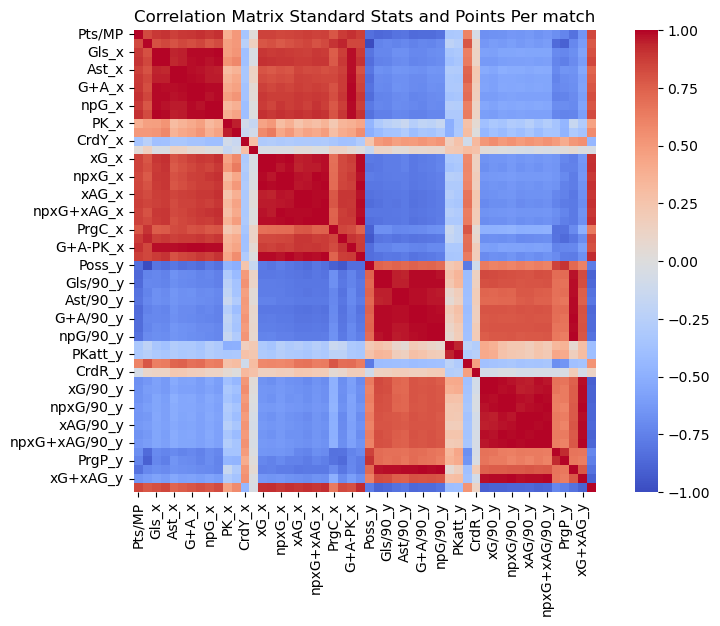

In [299]:
#correlation matrix for variables in merged dataframe

corr_matrix = merged_df_no_squad.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, cmap = 'coolwarm', cbar = True, square = True, fmt = ".2f")
plt.title('Correlation Matrix Standard Stats and Points Per match')
plt.show()

In [300]:
#found correlation scores between variables and Points Per Match 

pts_mp_corr = corr_matrix['Pts/MP'].drop('Pts/MP', axis = 0)
sorted_corr = pts_mp_corr.sort_values(ascending = False)
print(sorted_corr)

G+A/90_x         0.909661
G+A-PK_x         0.909025
npG/90_x         0.906727
Gls/90_x         0.904347
G+A_x            0.891725
Gls_x            0.889611
Ast/90_x         0.888820
npG_x            0.883582
PrgP_x           0.881868
xG+xAG_x         0.869942
xAG/90_x         0.867281
Ast_x            0.866410
npxG+xAG/90_x    0.865569
xAG_x            0.858780
npxG+xAG_x       0.854070
xG/90_x          0.853189
xG_x             0.852134
npxG/90_x        0.850465
xGD              0.839989
npxG_x           0.837813
Poss_x           0.835468
PrgC_x           0.788839
CrdY_y           0.604982
PKatt_x          0.501919
PK_x             0.390116
CrdR_x           0.025568
CrdR_y          -0.057919
PKatt_y         -0.317755
PK_y            -0.321044
CrdY_x          -0.346883
xAG/90_y        -0.629426
npxG+xAG/90_y   -0.640070
npxG/90_y       -0.640327
xAG_y           -0.643300
xG+xAG_y        -0.654186
npxG+xAG_y      -0.657007
npxG_y          -0.660448
xG/90_y         -0.665494
xG_y        

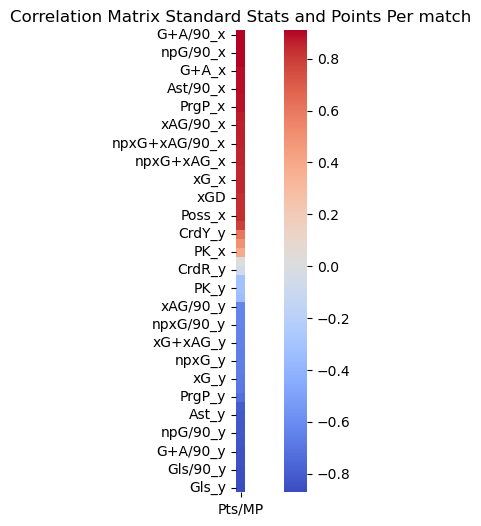

In [301]:
#correlation matrix standard stats and points per match correlation to determine direction of relationship

sorted_corr_df = sorted_corr.to_frame()
plt.figure(figsize = (10,6))
sns.heatmap(sorted_corr_df, cmap = 'coolwarm', cbar = True, square = True, fmt = ".2f")
plt.title('Correlation Matrix Standard Stats and Points Per match')
plt.show()

In [302]:
#found absolute correlation between variables and points per match to determine absolute strength of relationship, after having determined positive or negative

pts_mp_corr_abs = corr_matrix['Pts/MP'].drop('Pts/MP', axis = 0)
sorted_corr_abs = pts_mp_corr_abs.abs().sort_values(ascending = False)
print(sorted_corr_abs)

G+A/90_x         0.909661
G+A-PK_x         0.909025
npG/90_x         0.906727
Gls/90_x         0.904347
G+A_x            0.891725
Gls_x            0.889611
Ast/90_x         0.888820
npG_x            0.883582
PrgP_x           0.881868
Gls_y            0.871455
xG+xAG_x         0.869942
xAG/90_x         0.867281
Ast_x            0.866410
npxG+xAG/90_x    0.865569
G+A_y            0.858880
xAG_x            0.858780
Gls/90_y         0.858194
npxG+xAG_x       0.854070
xG/90_x          0.853189
xG_x             0.852134
npxG/90_x        0.850465
npG_y            0.845521
G+A/90_y         0.845315
xGD              0.839989
npxG_x           0.837813
Poss_y           0.835468
Poss_x           0.835468
npG/90_y         0.827287
G+A-PK_y         0.824710
Ast_y            0.818732
Ast/90_y         0.804964
PrgC_x           0.788839
PrgP_y           0.731340
PrgC_y           0.684010
xG_y             0.678272
xG/90_y          0.665494
npxG_y           0.660448
npxG+xAG_y       0.657007
xG+xAG_y    

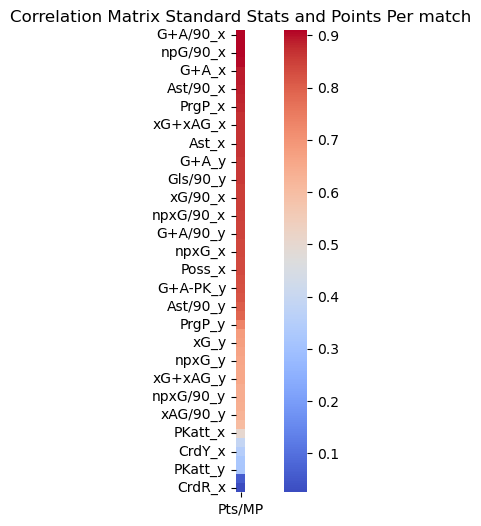

In [303]:
#correlation matrix of absolute relationship strength

sorted_corr_abs_df = sorted_corr_abs.to_frame()
plt.figure(figsize = (10,6))
sns.heatmap(sorted_corr_abs_df, cmap = 'coolwarm', cbar = True, square = True, fmt = ".2f")
plt.title('Correlation Matrix Standard Stats and Points Per match')
plt.show()

# Variable Relationship to Pts/Match

| Very Strong Correlation (score > 0.8) | Score |
| --------------------------- | ----- |
| G+A/90_x    |     0.909661 |
| G+A-PK_x     |    0.909025 |
| npG/90_x      |   0.906727 |
| Gls/90_x       |  0.904347 |
| G+A_x           | 0.891725 |
| Gls_x            |0.889611 |
| Ast/90_x         |0.888820 |
| npG_x            |0.883582 |
| PrgP_x           |0.881868 |
| Gls_y            |0.871455 |
| xG+xAG_x         |0.869942 |
| xAG/90_x         |0.867281 |
| Ast_x            |0.866410 |
| npxG+xAG/90_x    |0.865569 |
| G+A_y            |0.858880 |
| xAG_x            |0.858780 |
| Gls/90_y         |0.858194 |
| npxG+xAG_x       |0.854070 |
| xG/90_x          |0.853189 |
| xG_x             |0.852134 |
| npxG/90_x        |0.850465 |
| npG_y            |0.845521 |
| G+A/90_y         |0.845315 |
| xGD              |0.839989 |
| npxG_x           |0.837813 |
| Poss_y           |0.835468 |
| Poss_x           |0.835468 |
| npG/90_y         |0.827287 |
| G+A-PK_y         |0.824710 |
| Ast_y            |0.818732 |
|Ast/90_y         |0.804964 |

|Strong Correlation (0.6 < score < 0.8)| Score|
|--------------------------------- | -----|
| PrgC_x  |         0.788839 |
| PrgP_y   |        0.731340 |
| PrgC_y    |       0.684010 |
| xG_y       |      0.678272 |
| xG/90_y     |     0.665494 |
| npxG_y       |    0.660448 |
| npxG+xAG_y    |   0.657007 |
| xG+xAG_y       |  0.654186 |
| xAG_y           | 0.643300 |
| npxG/90_y        |0.640327 |
| npxG+xAG/90_y    |0.640070 |
| xAG/90_y         |0.629426 |
| CrdY_y           |0.604982 |

## Now that we know what variables have a (Very) Strong Relationship to Points Per Match, we want to build a model that will use these relationships to build an analyzer tool and predictor model.